# Home Credit Default Risk - In Progress

## Background Information

Home Credit is an international finance provider funded in 1997 in Czech Republic with operation in 9 different countries. The task is to used dataset provided and predict whether or nor a client will repay a loan or have difficulty repay the loan. 


## Data Description

Data is provided by Home Credit. Data can be download at Kaggle open dataset: https://www.kaggle.com/c/home-credit-default-risk/data

The Dataset including the following source:

1. application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. 
    
    
2. bureau.csv: All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


3. bureau_balance.csv: monthly balances of previous credits in Credit Bureau.This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.


4. POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


5. credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.


6. previous_application.csv:All previous applications for Home Credit loans of clients who have loans in our sample.There is one row for each previous application related to loans in our data sample.


7. installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment.One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


8. HomeCredit_columns_description.csv:This file contains descriptions for the columns in the various data files.


![home_credit.png](image/home_credit.png)

# Import Packages and Data

In [1]:
#import packages
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# import data 
app_train = pd.read_csv("Data/application_train.csv")
bureau = pd.read_csv("Data/bureau.csv")
bur_bal = pd.read_csv("Data/bureau_balance.csv")
pos_cash =pd.read_csv("Data/POS_CASH_balance.csv")
cc_balance = pd.read_csv("Data/credit_card_balance.csv")
py_bal = pd.read_csv("Data/previous_application.csv")
ins_pmt= pd.read_csv("Data/installments_payments.csv")


In [3]:
#inspect data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
bureau.head() 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
bur_bal.head() 

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
cc_balance.head() 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
py_bal.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ins_pmt.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Data Cleaning

## app_train


In [10]:
# Check app_train info
app_train.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

### Missing data

In [11]:
#check on the missing data for app_train
total_miss = app_train.isnull().sum().sort_values(ascending=False)
miss_percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending=False)
miss_summ = pd.concat([total_miss, miss_percent], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ

,Total Missing,Missing Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


#### Current living area measurement
Based on above missing data summary app_train, we can see that most of the missing columns involved missing information about their current living area measurement. People failed to put this information maybe simply due to they do not know what are the exact measurement of their current living places, especially to each floor, living area, non-living area.  For the purpose of this prediction, I assume the current detailed living area has no impact on whether or not the client can repay the loan. Therefore, I will delete those columns related to detailed measurement of current living places.  

In [17]:
# check the index names related to current living area detailed measurement in miss_summ. Based on the miss_summ 
# all of the measurement are missing more than 40%
miss_summ[miss_summ['Missing Percent']>40].index


Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE',
       'EMERGE

In [18]:
# Delete the columns related to current living area detailed measurement. 
app_train1 = app_train.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
                             'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 
                             'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 
                             'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 
                             'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 
                             'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 
                             'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 
                             'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 
                             'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 
                             'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 
                             'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 
                             'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis=1)

In [21]:
#recheck the missing data summary
total_miss1 = app_train1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (app_train1.isnull().sum()/app_train1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
EXT_SOURCE_1,173378,56.381073
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148


#### Ext_source_1, 2 & 3

Ext_Source_1, 2 and 3 are the normalized scores from external source. Most likely these three scores are some kind of credit report for the applicant. Since they are the external measurement of the applicant, they are crucial parts of the data. Therefore, we will examine the data and fill in the missing value. Based on the histograms below, it seems the Ext_source_1 is normally distributed, while Ext_source_2 and Ext_source_3 are skewed to the left. The distribution of Ext_source_2 and Ext_source_3 are similar and they are different than Ext_source_1. 


In [37]:
#Check the summary stats for ext_source_1
app_train1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


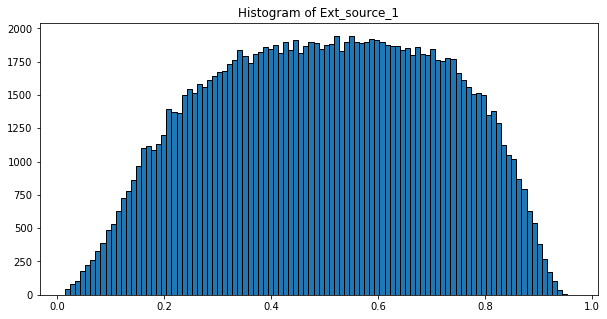

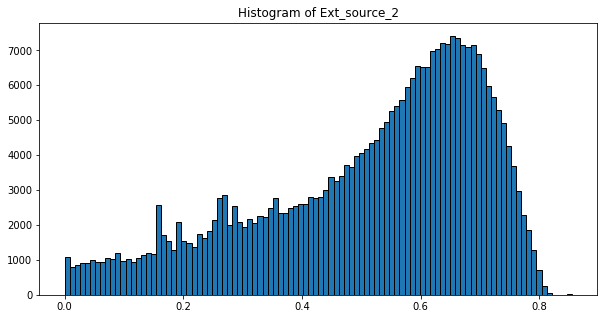

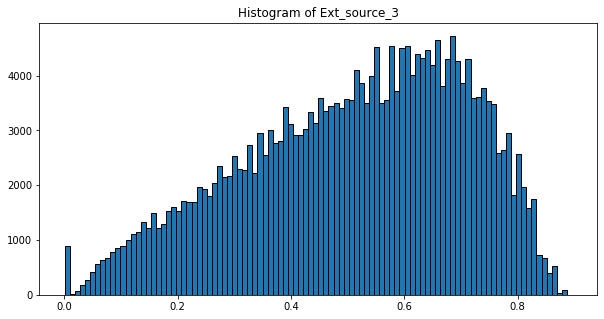

In [40]:
#Plot out the distribution for EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
plt.figure(figsize =(10,5))
plt.hist(app_train1['EXT_SOURCE_1'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_1")

plt.figure(figsize=(10,5))
plt.hist(app_train1['EXT_SOURCE_2'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_2")

plt.figure(figsize=(10,5))
plt.hist(app_train1['EXT_SOURCE_3'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_3")


plt.show()

For missing data in the ext_source_1, 2, and 3, it would be a good idea to use regression to impute the missing data. However, we need to test whether there will be any correlation between each of the external source and the correlation of each external source vs all other columns. However, based on the correlation test below, each of the external source has no strong statistical correlation with each other. Also each of the external source has no strong statistical correlation with all other columns. Using regression to impute missing data will impose bias on the predicted values. Therefore, I will impute the missing values of Ext_source_1 with mean and missing values of Ext_source_2, Ext_source_3 with the median of each columns.   

In [43]:
#Check on the correlation of the three score
app_train1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.213982,0.186846
EXT_SOURCE_2,0.213982,1.000000,0.109167
EXT_SOURCE_3,0.186846,0.109167,1.000000


In [56]:
#Correlation of EXT_SOURCE_1 and all other columns
app_train1.corr()['EXT_SOURCE_1'].sort_values(ascending=False)

EXT_SOURCE_1                   1.000000
DAYS_EMPLOYED                  0.289848
EXT_SOURCE_2                   0.213982
FLAG_DOCUMENT_6                0.190874
EXT_SOURCE_3                   0.186846
AMT_GOODS_PRICE                0.175502
AMT_CREDIT                     0.168429
AMT_ANNUITY                    0.119398
REGION_POPULATION_RELATIVE     0.099997
FLAG_PHONE                     0.081241
HOUR_APPR_PROCESS_START        0.032007
AMT_REQ_CREDIT_BUREAU_MON      0.030820
AMT_INCOME_TOTAL               0.026232
FLAG_EMAIL                     0.015678
FLAG_DOCUMENT_9                0.014150
FLAG_DOCUMENT_14               0.009592
AMT_REQ_CREDIT_BUREAU_YEAR     0.006562
FLAG_DOCUMENT_19               0.005131
FLAG_DOCUMENT_4                0.004553
FLAG_DOCUMENT_7                0.003981
FLAG_DOCUMENT_15               0.002903
FLAG_CONT_MOBILE               0.002659
FLAG_DOCUMENT_10               0.002553
FLAG_DOCUMENT_12               0.001717
FLAG_DOCUMENT_2                0.001185


In [57]:
#Correlation of EXT_SOURCE_2 and all other columns
app_train1.corr()['EXT_SOURCE_2'].sort_values(ascending=False)

EXT_SOURCE_2                   1.000000
EXT_SOURCE_1                   0.213982
REGION_POPULATION_RELATIVE     0.198924
HOUR_APPR_PROCESS_START        0.156863
AMT_GOODS_PRICE                0.139367
AMT_CREDIT                     0.131228
AMT_ANNUITY                    0.125804
EXT_SOURCE_3                   0.109167
FLAG_PHONE                     0.061178
AMT_INCOME_TOTAL               0.060925
AMT_REQ_CREDIT_BUREAU_MON      0.051981
FLAG_DOCUMENT_8                0.050684
LIVE_REGION_NOT_WORK_REGION    0.030049
REG_REGION_NOT_WORK_REGION     0.029517
FLAG_DOCUMENT_13               0.023794
FLAG_EMAIL                     0.023743
FLAG_DOCUMENT_14               0.021026
FLAG_EMP_PHONE                 0.019459
FLAG_DOCUMENT_9                0.016688
REG_REGION_NOT_LIVE_REGION     0.015570
FLAG_DOCUMENT_16               0.013030
FLAG_DOCUMENT_15               0.008417
FLAG_DOCUMENT_5                0.004249
FLAG_DOCUMENT_19               0.003256
FLAG_DOCUMENT_4                0.003036


In [58]:
#Correlation of EXT_SOURCE_3 and all other columns
app_train1.corr()['EXT_SOURCE_3'].sort_values(ascending=False)

EXT_SOURCE_3                   1.000000
EXT_SOURCE_1                   0.186846
DAYS_EMPLOYED                  0.113434
EXT_SOURCE_2                   0.109167
FLAG_DOCUMENT_6                0.074970
AMT_GOODS_PRICE                0.047717
AMT_CREDIT                     0.043516
AMT_ANNUITY                    0.030752
FLAG_CONT_MOBILE               0.012134
FLAG_DOCUMENT_4                0.003193
FLAG_PHONE                     0.002608
FLAG_DOCUMENT_16               0.002470
FLAG_DOCUMENT_17               0.001200
FLAG_DOCUMENT_12               0.001161
FLAG_DOCUMENT_15               0.000839
FLAG_DOCUMENT_7                0.000468
FLAG_DOCUMENT_13               0.000446
SK_ID_CURR                     0.000222
OBS_30_CNT_SOCIAL_CIRCLE      -0.000419
OBS_60_CNT_SOCIAL_CIRCLE      -0.000717
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001193
FLAG_DOCUMENT_14              -0.001344
FLAG_DOCUMENT_19              -0.002590
FLAG_DOCUMENT_10              -0.003951
FLAG_DOCUMENT_5               -0.005599


In [74]:
# Fill NA for Ext_source_1 with mean
ext_source_fill = app_train1['EXT_SOURCE_1'].fillna(app_train1['EXT_SOURCE_1'].mean(), axis=0)
app_train1['EXT_SOURCE_1']=ext_source_fill

#sanity check 
app_train1['EXT_SOURCE_1'].isnull().sum()

0

In [80]:
# Fill NA for EXT_source_2 with median
ext_source_2_fill = app_train1['EXT_SOURCE_2'].fillna(app_train1['EXT_SOURCE_2'].median(), axis=0)
app_train1['EXT_SOURCE_2']= ext_source_2_fill

#Sanity check 
app_train1['EXT_SOURCE_2'].isnull().sum()

0

In [82]:
# Fill NA for EXT_source_2 with median
ext_source_3_fill = app_train1['EXT_SOURCE_3'].fillna(app_train1['EXT_SOURCE_3'].median(), axis=0)
app_train1['EXT_SOURCE_3']= ext_source_3_fill

#Sanity check 
app_train1['EXT_SOURCE_3'].isnull().sum()

0

In [83]:
#recheck the missing data summary
total_miss1 = app_train1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (app_train1.isnull().sum()/app_train1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
OCCUPATION_TYPE,96391,31.345545
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021


### Occupation type

Another significant missing data is occupation type. Based on the distribution of available occupation count, I assume that the missing occupation type have the similar distribution of the non-missing occupation count. 

Based on the occupation count, we can combine the type of occupation into following four categories: Laborers, Sales Staff, Core Staff, and Managers. Merged other occupation into the four categories based on the name of the occupation, since other occupations have less than 10% of the total data.

Laborers include: Security Staff, Cooking staff, Cleaning Staff, Low-skill laborers,Waiters/barmen staff
Sales staff include:Realty Agents
Core staff include: High skill tech staff, accountants, Medicine staff, 

In [89]:
#Check the distribution of Occupation type
occupation_count = app_train1['OCCUPATION_TYPE'].value_counts()
occupation_percent = (app_train1['OCCUPATION_TYPE'].value_counts()/app_train1['OCCUPATION_TYPE'].count())*100
occupation_summary = pd.concat([occupation_count, occupation_percent], axis=1, keys =['Occupation Count', 'Occupation Percentage'])
occupation_summary

,Occupation Count,Occupation Percentage
Laborers,55186,26.139636
Sales staff,32102,15.205570
Core staff,27570,13.058924
Managers,21371,10.122679
Drivers,18603,8.811576
High skill tech staff,11380,5.390299
Accountants,9813,4.648067
Medicine staff,8537,4.043672
Security staff,6721,3.183498
Cooking staff,5946,2.816408


pandas.core.series.Series

# To Be Continued. 